In [1]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FORESIGHT_DIRECTORY = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_PROCESSED_DIRECTORY = os.path.join(FORESIGHT_DIRECTORY, "data", "processed")

# Nombre de los archivos
TRAIN_FILENAME = "X_train.csv"
TEST_FILENAME = "X_test.csv"

# Rutas completas
TRAIN_PATH = os.path.join(DATA_PROCESSED_DIRECTORY, TRAIN_FILENAME)
TEST_PATH = os.path.join(DATA_PROCESSED_DIRECTORY, TEST_FILENAME)

In [3]:
X_test = pd.read_csv(TEST_PATH)
X_train = pd.read_csv(TRAIN_PATH)

In [4]:
y_train = X_train['difficulty']
X_train = X_train.drop('difficulty', axis=1)
y_test = X_test['difficulty']
X_test = X_test.drop('difficulty', axis=1)

In [5]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
best_rf = grid.best_estimator_

# Evaluar el mejor modelo
y_pred_best = best_rf.predict(X_test)
print("Best Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nBest Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

KeyboardInterrupt: 

Accuracy: 0.6555333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52      4062
           1       0.60      0.59      0.60     10839
           2       0.42      0.42      0.42      5982
           3       0.13      0.13      0.13      1228
           4       0.06      0.07      0.07       240
           5       0.08      0.08      0.08        60
           6       0.21      0.23      0.22      2093
           7       0.11      0.11      0.11       757
           8       0.03      0.03      0.03       126
           9       0.91      0.90      0.91     19613

    accuracy                           0.66     45000
   macro avg       0.31      0.31      0.31     45000
weighted avg       0.66      0.66      0.66     45000

Confusion Matrix:
 [[ 2116  1673   160    23     4     3    46    15     1    21]
 [ 1708  6407  1736   154    15     5   526    95    13   180]
 [  152  1711  2508   396    55     5   50

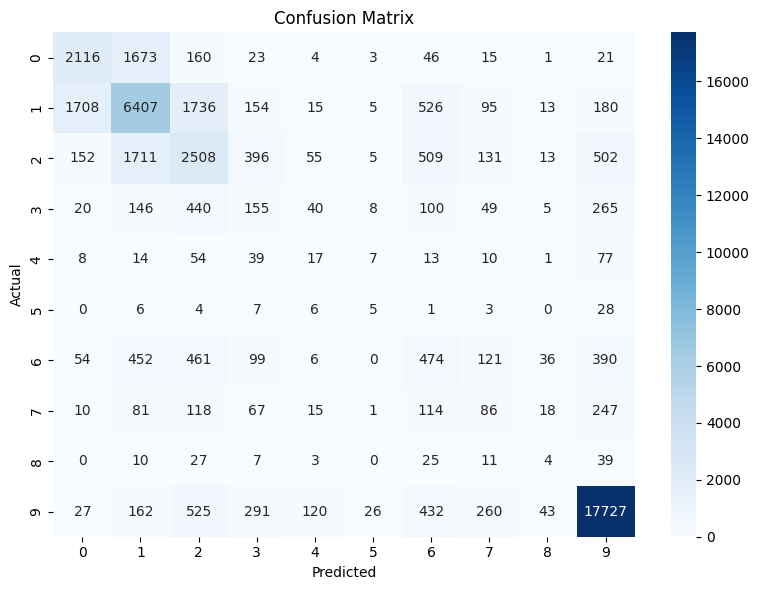

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(cm.shape[0]), yticklabels=range(cm.shape[0]))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()